In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


# 01- Mean, Median, and Mode


In [2]:
array = [99,86,87,88,111,86,103,87,94,78,77,85,86]
print("mean: ", np.mean(array))

array = [99,86,87,88,111,86,103,87,94,78,77,85,86]
# array.sort()
print("median: ", np.median(array))


array = [99,86,87,88,111,86,103,87,94,78,77,85,86]
print("mode: ", stats.mode(array))


mean:  89.76923076923077
median:  87.0
mode:  ModeResult(mode=array([86]), count=array([3]))


# 02- Standard Deviation and Variance

In [3]:
array = [32,111,138,28,59,77,97]
print("std: ", np.std(array))

array = [32,111,138,28,59,77,97]
print("Variance: ", np.var(array))

std:  37.84501153334721
Variance:  1432.2448979591834


# 03- Percentiles

In [4]:
ages = [5,31,43,48,50,41,7,11,15,39,80,82,32,2,8,6,25,36,27,61,31]

#What is the age that 75% of the people are younger than?
print("age that 75% of the people are younger than: ",np.percentile(ages, 75))

age that 75% of the people are younger than:  43.0


# 04- Data Distribution
create a completely random array, of a given size, and between two given values

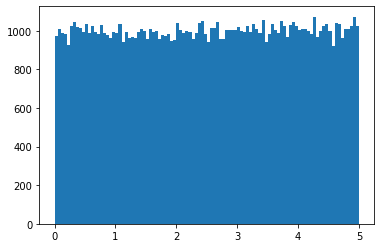

In [9]:
array = np.random.uniform(0.0, 5.0, 100000)

plt.hist(array, 100)
plt.show()


# 05- Normal Data Distribution

create an array where the values are concentrated around a given value

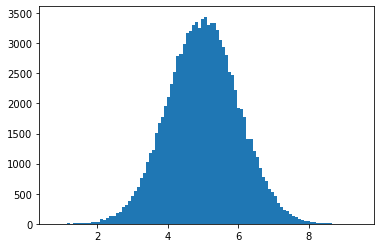

In [8]:
array = np.random.normal(5.0, 1.0, 100000)

plt.hist(array, 100)
plt.show()

# 06-  Scatter Plot


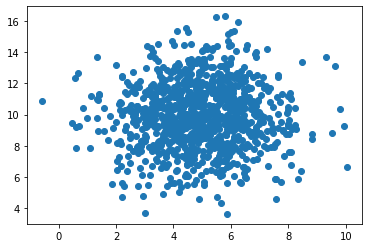

In [14]:
#array with the mean of 5.0 and standard deviation of 1.0.
x = np.random.normal(5.0, 1.5, 1000)

#array with the mean of 10.0 and standard deviation of 2.0
y = np.random.normal(10.0, 2.0, 1000)

plt.scatter(x, y)
plt.show()

# 07- Linear Regression
Linear regression uses the relationship between the data-points to draw a straight line through all them

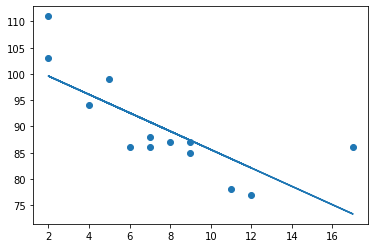

85.59308314937454


In [17]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

'''
Execute a method that returns some important key values of Linear Regression

relationship - the coefficient of correlation - is called r: The r value ranges from -1 to 1, 
where 0 means no relationship, and 1 (and -1) means 100% related

'''

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

#Predict
speed = myfunc(10)
print(speed)

# 08- Polynomial Regression
uses the relationship between the variables x and y to find the best way to draw a line through the data points

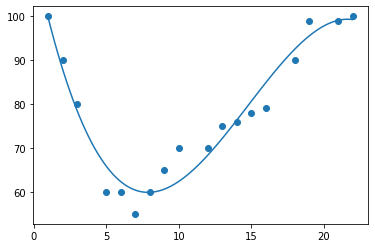

In [24]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

model = np.poly1d(np.polyfit(x, y, 3))

line = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(line, model(line))
plt.show()

# 09- Multiple Regression
like linear regression, but with more than one independent value, meaning that we try to predict a value based on two or more variables.

In [2]:
import pandas as pd
from sklearn import linear_model

#Pandas module allows us to read csv files and return a DataFrame object
DataFrame = pd.read_csv("cars.csv")

X = DataFrame[['Weight', 'Volume']]
y = DataFrame['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predicted = regr.predict([[2300, 1300]])
print(predicted)

#coefficient is a factor that describes the relationship with an unknown variable
'''
In this case, we can ask for the coefficient value of weight against CO2, and for volume against CO2.
The answer(s) we get tells us what would happen if we increase,
or decrease, one of the independent values.
'''

print(regr.coef_)

[107.2087328]
[0.00755095 0.00780526]


# 10- Scale
scale data into new values that are easier to compare

standardization method uses this formula:

z = (x - u) / s

Where z is the new value, x is the original value,  is the mean and s is the standard deviation.

In [23]:
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler


scale = StandardScaler()

DataFrame = pd.read_csv("cars.csv")

X = DataFrame[['Weight', 'Volume']]
y = DataFrame['CO2']
scaledX = scale.fit_transform(X)
# print(scaledX)

regr = linear_model.LinearRegression()
regr.fit(scaledX, y)

#predict
scaled = scale.transform([[2300, 1300]])
print(scaled)

predicted = regr.predict([scaled[0]])
print(predicted)

[[ 4.22104928 -0.81116837]]
[107.2087328]


# 11- Train/Test


#### 11-1- polynomial regression line through the data points

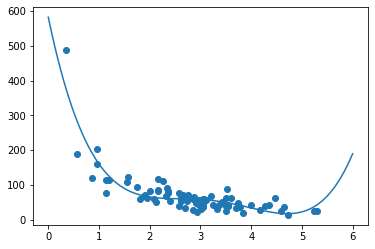

In [11]:
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

#Draw a polynomial regression line through the data point

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

myline = np.linspace(0, 6, 100)

plt.scatter(train_x, train_y)
plt.plot(myline, mymodel(myline))
plt.show()

#### 11-2-  R2 or R-squared

It measures the relationship between the x axis and the y axis, and the value ranges from 0 to 1

In [18]:
from sklearn.metrics import r2_score

np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 3))

r2 = r2_score(train_y, mymodel(train_x))

print(r2)

0.735999316871548


#### 11-3- R2 score when using testing data

In [19]:
from sklearn.metrics import r2_score


np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]

test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))

r2 = r2_score(test_y, mymodel(test_x))

print(r2)

0.8086921460343559
